In [5]:
from unet.dual_domain_net import DualDomainNet
import torch
from unet.basic_unet_denose import BasicUNetDe
from unet.basic_unet import BasicUNetEncoder
number_modality = 4
number_targets = 3

In [8]:
model = BasicUNetEncoder(3, number_modality, number_targets, [64, 64, 128, 256, 512, 64])
x = torch.rand(1, 4, 128, 128, 128)  # Removed .cuda() 
outputs = model(x)

BasicUNet features: (64, 64, 128, 256, 512, 64).


In [9]:
for i, out in enumerate(outputs):
    print(f"Output {i} shape: {out.shape}")

Output 0 shape: torch.Size([1, 64, 128, 128, 128])
Output 1 shape: torch.Size([1, 64, 64, 64, 64])
Output 2 shape: torch.Size([1, 128, 32, 32, 32])
Output 3 shape: torch.Size([1, 256, 16, 16, 16])
Output 4 shape: torch.Size([1, 512, 8, 8, 8])


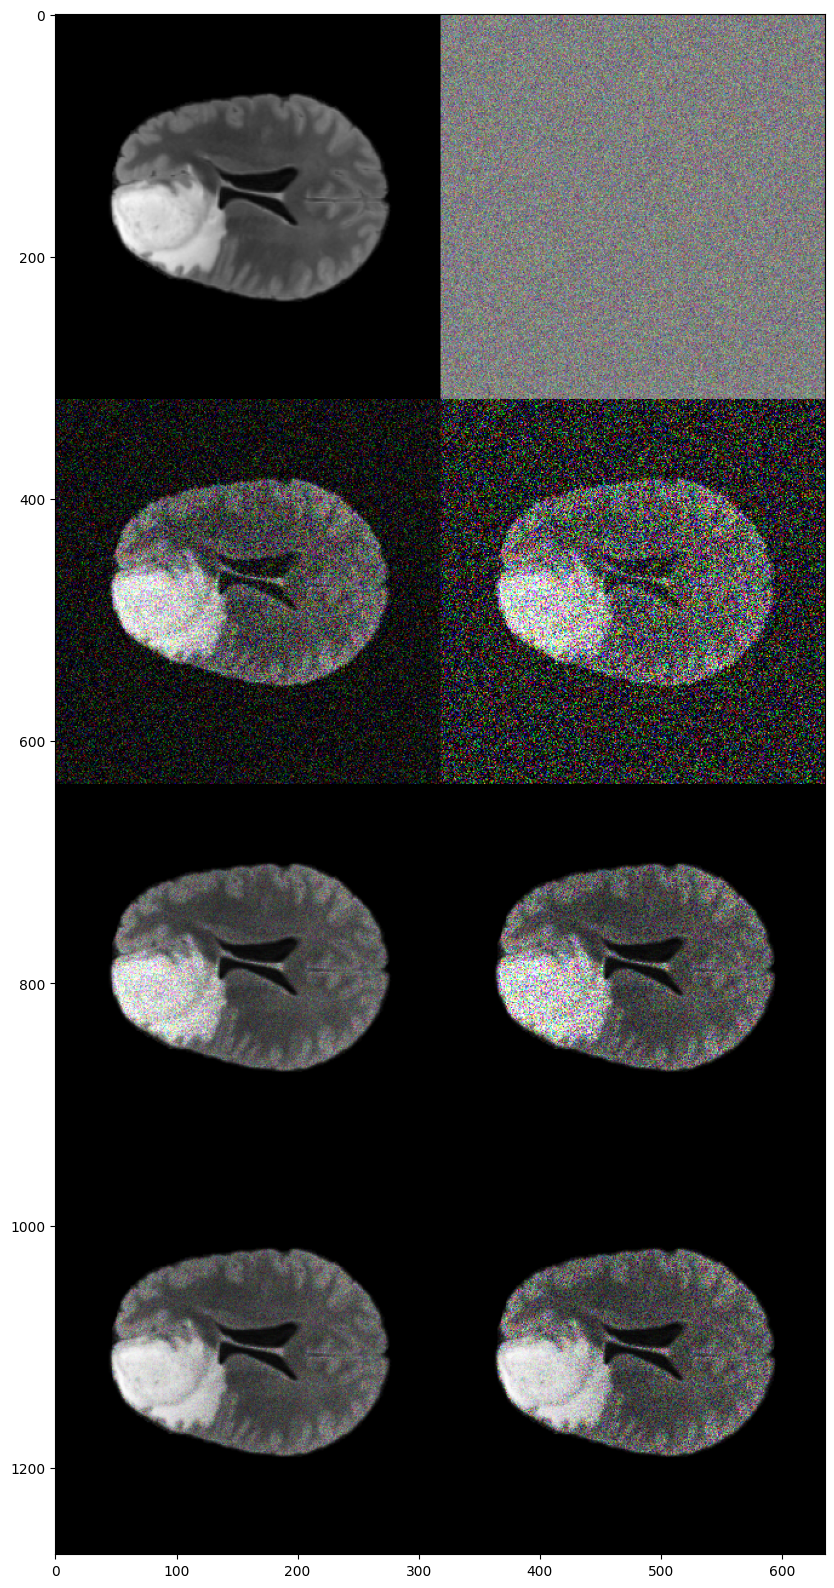

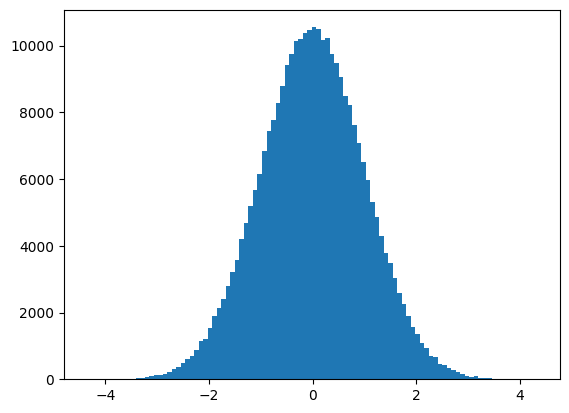

In [16]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('img.png')[...,::-1]/255.0
noise =  np.random.normal(loc=0, scale=1, size=img.shape)

# noise overlaid over image
noisy = np.clip((img + noise*0.2),0,1)
noisy2 = np.clip((img + noise*0.4),0,1)

# noise multiplied by image:
# whites can go to black but blacks cannot go to white
noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

noisy2mul = np.clip((img*(1 + noise*0.2)),0,1)
noisy4mul = np.clip((img*(1 + noise*0.4)),0,1)

# noise multiplied by bottom and top half images,
# whites stay white blacks black, noise is added to center
img2 = img*2
n2 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.2)), (1-img2+1)*(1 + noise*0.2)*-1 + 2)/2, 0,1)
n4 = np.clip(np.where(img2 <= 1, (img2*(1 + noise*0.4)), (1-img2+1)*(1 + noise*0.4)*-1 + 2)/2, 0,1)


# norm noise for viz only
noise2 = (noise - noise.min())/(noise.max()-noise.min())
plt.figure(figsize=(20,20))
plt.imshow(np.vstack((np.hstack((img, noise2)),
                      np.hstack((noisy, noisy2)),
                      np.hstack((noisy2mul, noisy4mul)),
                      np.hstack((n2, n4)))))
plt.show()
plt.hist(noise.ravel(), bins=100)
plt.show()